# EDA (Análisis Exploratorio de Datos)

#### Importamos las bibliotecas necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#### Lectura de datos

In [2]:
hechos = pd.read_csv('../data/clean/hechos.csv')
victimas = pd.read_csv('../data/clean/victimas.csv')

C:\Users\jacev\AppData\Local\Temp\ipykernel_13660\1322225679.py:1: DtypeWarning: Columns (8,9,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  hechos = pd.read_csv('../data/clean/hechos.csv')


#### Primera vista de los datos

In [3]:
hechos.head()

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,otra_direccion,geocodificacion_CABA,longitud,latitud,moto,auto,transporte_publico,camion,ciclista,gravedad
0,2016-0001,1,2016-01-01 00:00:00,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-0002,1,2016-01-02 00:00:00,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-0003,1,2016-01-03 00:00:00,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-0004,1,2016-01-10 00:00:00,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-0005,1,2016-01-21 00:00:00,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
victimas.head()

,id,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento,id hecho,aaa,fecha,vehiculo_victima,edad_victima,gravedad
0,2016-0001,2016-01-01,2016.0,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-0002,2016-01-02,2016.0,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-0003,2016-01-03,2016.0,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-0004,2016-01-10,2016.0,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-0005,2016-01-21,2016.0,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


#### Tipo de datos por columna

In [5]:
hechos.dtypes

id                        object
n_victimas                 int64
fecha                     object
aaaa                       int64
mm                         int64
dd                         int64
hora                      object
hh                        object
lugar_del_hecho           object
tipo_de_calle             object
calle                     object
altura                   float64
cruce                     object
dirección normalizada     object
comuna                    object
xy (caba)                 object
pos x                     object
pos y                     object
participantes             object
victima                   object
acusado                   object
direccion_normalizada     object
tipo_calle                object
otra_direccion            object
geocodificacion_CABA      object
longitud                  object
latitud                   object
moto                      object
auto                      object
transporte_publico        object
camion    

In [6]:
victimas.dtypes

id                      object
fecha                   object
aaaa                   float64
mm                       int64
dd                       int64
rol                     object
victima                 object
sexo                    object
edad                    object
fecha_fallecimiento     object
id hecho                object
aaa                    float64
fecha                   object
vehiculo_victima        object
edad_victima            object
gravedad                object
dtype: object

#### Valores duplicados

In [7]:
# Verificamos si tenemos valores duplicados considerando el 'id' como identificador único
print(hechos.duplicated().sum())

print(victimas.duplicated().sum())

0
622


In [8]:
# mostrar registros duplicados del dataframe victimas considerando la columna 'id hecho'
victimas[victimas.duplicated(subset='id hecho', keep=False)].sort_values('id hecho')


,id,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento,id hecho,aaa,fecha,vehiculo_victima,edad_victima,gravedad
16905,NaN,NaN,NaN,8,30,NaN,NaN,varon,NaN,NaN,HC-2020-0499647,2020.0,2020-08-30,AUTO,60,SD
16904,NaN,NaN,NaN,8,30,NaN,NaN,mujer,NaN,NaN,HC-2020-0499647,2020.0,2020-08-30,AUTO,44,SD
16903,NaN,NaN,NaN,8,30,NaN,NaN,varon,NaN,NaN,HC-2020-0499647,2020.0,2020-08-30,AUTO,19,SD
23539,NaN,NaN,NaN,3,31,NaN,NaN,Varon,NaN,NaN,HC-2021-0147160,2021.0,2021-03-31,SD,45,SD
23538,NaN,NaN,NaN,3,31,NaN,NaN,Varon,NaN,NaN,HC-2021-0147160,2021.0,2021-03-31,SD,64,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021.0,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
713,2021-0093,2021-12-13,2021.0,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
714,2021-0094,2021-12-20,2021.0,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
715,2021-0095,2021-12-30,2021.0,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Agrupar y contar los registros en 'id hecho' para verificar si hay más de un registro por id
victimas.groupby('id hecho').size().sort_values(ascending=False)

id hecho
LC-2019-0188476      16
LC-2019-0291069      16
LC-2021-0137640      10
LC-2019-0428120      10
LC-2019-0049800      10
                     ..
LC-2019-0657084       1
LC-2019-0656859       1
LC-2019-0656791       1
LC-2019-0656764       1
PNA-2019-0005246      1
Length: 23785, dtype: int64

##### Observamos que el Dataframe 'victimas' contiene 622 filas duplicadas, sin embargo al analizar un dato duplicado, en este caso el 'id hecho' 'LC-2019-0188476' encontramos que los datos no son idénticos, por lo que no se consideran duplicados.

In [10]:
# Selecciono un id que esté duplicado para su verificación
victimas[victimas['id hecho'] == 'LC-2019-0188476']

,id,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento,id hecho,aaa,fecha,vehiculo_victima,edad_victima,gravedad
3442,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,76,SD
3443,NaN,NaN,NaN,3,26,NaN,NaN,Varon,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,76,SD
3444,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,25,SD
3445,NaN,NaN,NaN,3,26,NaN,NaN,Varon,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,54,SD
3446,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,29,SD
3447,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,45,SD
3448,NaN,NaN,NaN,3,26,NaN,NaN,Varon,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,32,SD
3449,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,21,SD
3450,NaN,NaN,NaN,3,26,NaN,NaN,Mujer,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,47,SD
3451,NaN,NaN,NaN,3,26,NaN,NaN,Varon,NaN,NaN,LC-2019-0188476,2019.0,2019-03-26,sd,66,SD


#### Hacemos un cruce utiizando el mismo 'id hecho' = 'LC-2019-0188476' con el dataframe hechos

In [11]:
hechos[hechos['id'] == 'LC-2019-0188476']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,otra_direccion,geocodificacion_CABA,longitud,latitud,moto,auto,transporte_publico,camion,ciclista,gravedad
2999,LC-2019-0188476,16,2019-03-26 00:00:00,2019,3,26,17:45:00,17,NaN,NaN,...,"EL GAUCHO 5918, Barrio: Villa Pueyrredon , ju...",Point (95738.90227411437081173 106034.32270565...,-58.509738,-34.574865,SD,SD,SD,SD,SD,SD


##### Al realizar el cruce de datos entre 'victimas' y 'hechos', la columna 'n_victimas' nos indica que hay 16 victimas involucradas. Entonces las 16 victimas comparten el 'id hecho', pués estuvieron involucrados en el mismo accidente, así que no son datos duplicados.

#### Registros con valores 'SD' ó 'Sin Datos'

In [12]:
# Contar los registros por columna con el valor 'SD' en el dataframe victimas
victimas[victimas == 'SD'].count()

id                         0
fecha                      0
aaaa                       0
mm                         0
dd                         0
rol                       11
victima                    9
sexo                    1935
edad                      53
fecha_fallecimiento       68
id hecho                   0
aaa                        0
fecha                      0
vehiculo_victima        4479
edad_victima            3990
gravedad               20722
dtype: int64

In [13]:
# Porcentaje de registros con el valor 'SD' en el dataframe victimas
round(victimas[victimas == 'SD'].count() / len(victimas) * 100, 2)

id                      0.00
fecha                   0.00
aaaa                    0.00
mm                      0.00
dd                      0.00
rol                     0.04
victima                 0.03
sexo                    6.83
edad                    0.19
fecha_fallecimiento     0.24
id hecho                0.00
aaa                     0.00
fecha                   0.00
vehiculo_victima       15.81
edad_victima           14.09
gravedad               73.17
dtype: float64

In [14]:
# Contar los registros por columna con el valor 'SD' en el dataframe hechos
hechos[hechos == 'SD'].count()

id                           0
n_victimas                   0
fecha                        0
aaaa                         0
mm                           0
dd                           0
hora                         5
hh                           1
lugar_del_hecho              1
tipo_de_calle                0
calle                        0
altura                       0
cruce                        0
dirección normalizada        0
comuna                     846
xy (caba)                    0
pos x                        0
pos y                        0
participantes                0
victima                  10742
acusado                  15311
direccion_normalizada    10815
tipo_calle               11045
otra_direccion           18295
geocodificacion_CABA      1213
longitud                  1209
latitud                   1209
moto                      8511
auto                     12543
transporte_publico       11801
camion                   12708
ciclista                 11353
gravedad

In [15]:
# Porcentaje de registros con el valor 'SD' en el dataframe hechos
round(hechos[hechos == 'SD'].count() / len(hechos) * 100, 2)

id                        0.00
n_victimas                0.00
fecha                     0.00
aaaa                      0.00
mm                        0.00
dd                        0.00
hora                      0.02
hh                        0.00
lugar_del_hecho           0.00
tipo_de_calle             0.00
calle                     0.00
altura                    0.00
cruce                     0.00
dirección normalizada     0.00
comuna                    3.46
xy (caba)                 0.00
pos x                     0.00
pos y                     0.00
participantes             0.00
victima                  43.88
acusado                  62.54
direccion_normalizada    44.18
tipo_calle               45.12
otra_direccion           74.73
geocodificacion_CABA      4.95
longitud                  4.94
latitud                   4.94
moto                     34.77
auto                     51.24
transporte_publico       48.20
camion                   51.91
ciclista                 46.37
gravedad

##### Encontramos un número alto de valores con 'SD' en los dataframes 'hechos' y 'victimas', lo que es posible que al momento del accidente no se contara con la información necesaria para poblar el dataset.

#### Análisis descriptivo

In [16]:
hechos[['n_victimas', 'aaaa','mm','dd']].describe()

,n_victimas,aaaa,mm,dd
count,24481.000000,24481.000000,24481.000000,24481.000000
mean,1.156856,2019.852620,6.600261,15.625465
std,0.544944,0.937644,3.479634,8.698323
min,0.000000,2016.000000,1.000000,1.000000
25%,1.000000,2019.000000,3.000000,8.000000
50%,1.000000,2020.000000,7.000000,16.000000
75%,1.000000,2021.000000,10.000000,23.000000
max,16.000000,2021.000000,12.000000,31.000000


##### n_victimas: Esta columna muestra el número de víctimas en cada observación. La media (mean) de esta columna es aproximadamente 1.16, lo que indica que, en promedio, hay alrededor de 1.16 víctimas por incidente. El valor mínimo es 0, lo que significa que hay observaciones sin víctimas, y el valor máximo es 16, lo que sugiere que hay observaciones con hasta 16 víctimas. La desviación estándar es aproximadamente 0.54. Esto indica que, en promedio, la cantidad de víctimas varía alrededor de 0.54 desde la media de 1.16. Una desviación estándar más alta sugiere una mayor variabilidad en el número de víctimas por incidente.

##### aaaa (año): Esta columna indica el año en que ocurrieron los incidentes. La media (mean) es aproximadamente 2019.85, lo que sugiere que la mayoría de los incidentes en este conjunto de datos ocurrieron cerca del año 2020. El año mínimo es 2016 y el máximo es 2021. La desviación estándar es aproximadamente 0.94. Esto indica que los años en que ocurrieron los incidentes tienden a variar alrededor de 0.94 desde la media de alrededor de 2019.85. Una desviación estándar más alta sugiere una mayor variabilidad en los años en que ocurrieron los incidentes.

##### mm (mes): Esta columna indica el mes en que ocurrieron los incidentes. La media (mean) es aproximadamente 6.6, lo que sugiere que, en promedio, los incidentes ocurrieron con mayor frecuencia en el sexto mes del año (junio). El mes mínimo es enero (1) y el máximo es diciembre (12). La desviación estándar es aproximadamente 3.48. Esto indica que los meses en que ocurrieron los incidentes tienden a variar alrededor de 3.48 desde la media de aproximadamente 6.6. Una desviación estándar más alta sugiere una mayor variabilidad en los meses en que ocurrieron los incidentes.

##### dd (día): Esta columna indica el día del mes en que ocurrieron los incidentes. La media (mean) es aproximadamente 15.63, lo que sugiere que, en promedio, los incidentes ocurrieron alrededor del día 15 del mes. El día mínimo es el primer día del mes (1) y el máximo es el último día del mes (31). La desviación estándar es aproximadamente 8.70. Esto indica que los días en que ocurrieron los incidentes tienden a variar alrededor de 8.70 desde la media de aproximadamente 15.63. Una desviación estándar más alta sugiere una mayor variabilidad en los días en que ocurrieron los incidentes.



In [17]:
# Agrupar por la columna 'comuna' y contar los registros
hechos.groupby('comuna').size().sort_values(ascending=False)

comuna
1                  2616
15                 1952
4                  1805
3                  1763
9                  1747
14                 1616
7                  1576
12                 1477
11                 1443
13                 1395
10                 1376
5                  1248
8                  1127
6                   978
2                   903
SD                  846
No Especificada     442
0                     2
dtype: int64

##### Encontramos que hay datos en 'comuna' registrado como 0, con 2 datos que no existe, así como datos 'SD' o 'No Especificada', lo que nos indica que no se cuenta con la información necesaria para poblar el dataset.

In [18]:
victimas[['aaa','mm','dd']].describe()

,aaa,mm,dd
count,27605.000000,28322.000000,28322.000000
mean,2019.897265,6.619907,15.629334
std,0.860899,3.481708,8.684060
min,2019.000000,1.000000,1.000000
25%,2019.000000,3.000000,8.000000
50%,2020.000000,7.000000,16.000000
75%,2021.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


#### Detección de outliers

##### Utilizamos el método de las 3 desviaciones estándar, el cual me permite establecer límites empíricos basados en la media y la desviación estándar de nuestros datos. Una vez que conozco estos límites, cualquier valor que se encuentre fuera de este rango se considera un valor atípico o outlier.

In [19]:
# Realizamos un dataframe donde conservamos sólo valores enteros de las edades para los homicidios.

df_hom  = victimas['edad'] = pd.to_numeric(victimas['edad'],errors='coerce')

df_hom = df_hom[~pd.isna(df_hom)]

df_hom.value_counts()

edad
30.0    28
29.0    24
23.0    24
28.0    20
27.0    20
        ..
11.0     1
13.0     1
85.0     1
7.0      1
88.0     1
Name: count, Length: 85, dtype: int64

In [20]:
# Realizo lo mismo para las edades de las victimas por lesiones

df_les = victimas['edad_victima'] = pd.to_numeric(victimas['edad_victima'], errors='coerce')

df_les = df_les[~pd.isna(df_les)]

df_les.value_counts()

edad_victima
28.0     812
29.0     805
27.0     776
30.0     765
26.0     761
        ... 
0.0        2
95.0       2
96.0       1
97.0       1
100.0      1
Name: count, Length: 99, dtype: int64

In [21]:
# Obtengo la media y la desviación estándar de la columna 'edad'
media = df_hom.mean()
desviacion_estandar = df_hom.std()

# Calculo los límites de los outliers
limite_inferior = media - 3 * desviacion_estandar
limite_superior = media + 3 * desviacion_estandar

# Identifico los outliers
outliers = df_hom.loc[(df_hom < limite_inferior) | (df_hom > limite_superior)]


print("Outliers para 'edad': ")
print(outliers)

Outliers para 'edad': 
Series([], Name: edad, dtype: float64)


##### Observamos que para las edades de victimas que fueron homicidios, no se encuentra ningún valor atípico.

In [22]:
# Obtengo la media y la desviación estándar de la columna 'edad_victima'
media = df_les.mean()
desviacion_estandar = df_les.std()

# Calculo los límites de los outliers
limite_inferior = media - 3 * desviacion_estandar
limite_superior = media + 3 * desviacion_estandar

# Identifico los outliers
outliers = df_les.loc[(df_les < limite_inferior) | (df_les > limite_superior)]


print("Outliers para 'edad_victima': ")
print(outliers)

Outliers para 'edad_victima': 
787      84.0
1228     85.0
1275     90.0
1681     85.0
1718     85.0
         ... 
27640    85.0
27725    84.0
27954    90.0
28275    90.0
28317    87.0
Name: edad_victima, Length: 150, dtype: float64


##### Con relación a victimas por lesiones, se encuentran 150 outliers, correspondientes a personas de edad avanzada involucradas en accidentes de tránsito.

#### Análisis con gráficos

#### Gráfico de caja y bigotes, con este gráfico podemos representar gráficamente la distribución de datos numéricos, ademas de poder visualizar la mediana (línea naranja) y los valores outliers como lo hicimos con el método de las 3 desviaciones estandar.

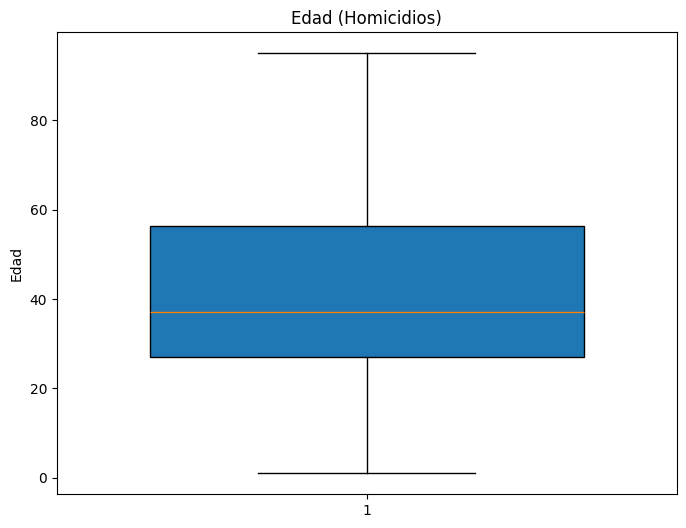

In [23]:
plt.figure(figsize=(8,6))
plt.boxplot(df_hom, vert=True, widths=0.7, patch_artist=True)

plt.ylabel('Edad')
plt.title('Edad (Homicidios)')

plt.show()

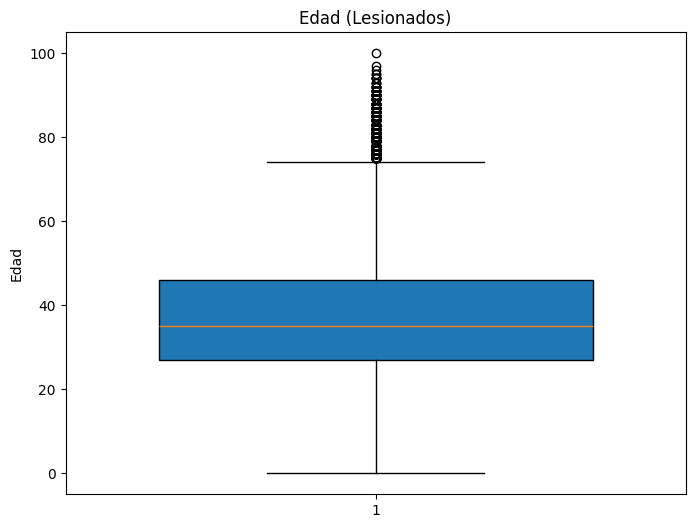

In [24]:
plt.figure(figsize=(8,6))
plt.boxplot(df_les, vert=True, widths=0.7, patch_artist=True)

plt.ylabel('Edad')
plt.title('Edad (Lesionados)')

plt.show()

##### Con base en el método de las 3 desviaciones estandar, observamos los outliers para las edades asociadas a las victimas por lesiones en accidentes.

#### Gráfico de barras, nos permite representar la frecuencia que ocurre una variable y ademas visualizar la distribución de datos categóricos

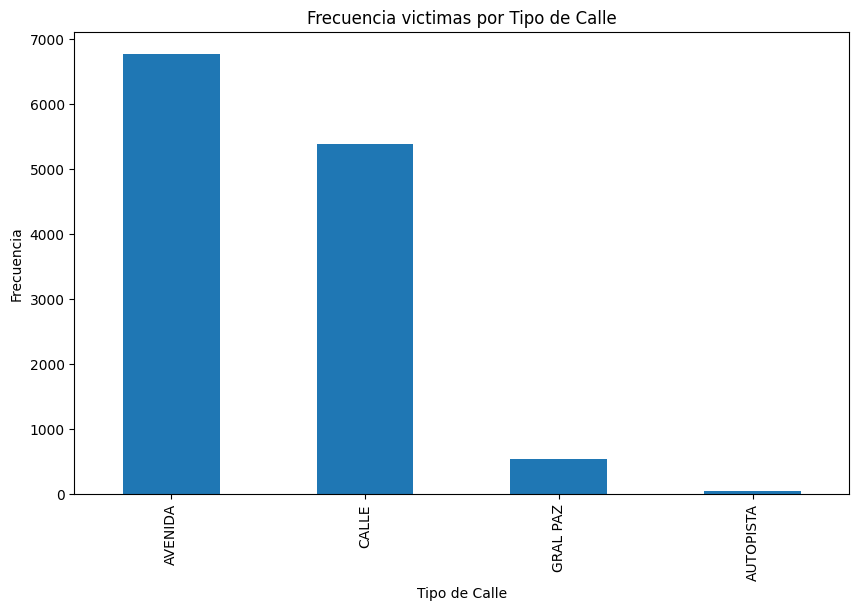

In [25]:
hechos_filtrados = hechos[hechos['tipo_calle'] != 'SD']

# Calcular la frecuencia de cada valor en 'tipo_calle'
frecuencias = hechos_filtrados['tipo_calle'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.title('Frecuencia victimas por Tipo de Calle')

# Mostrar el gráfico
plt.show()

##### Fácilmente se puede observar que los tipos de calle en donde es mas común los accidentes, son en las avenidas y calles, donde la 'GRAL PAZ' tambien se atribuye a una avenida de acuerdo al diccionario de palabras

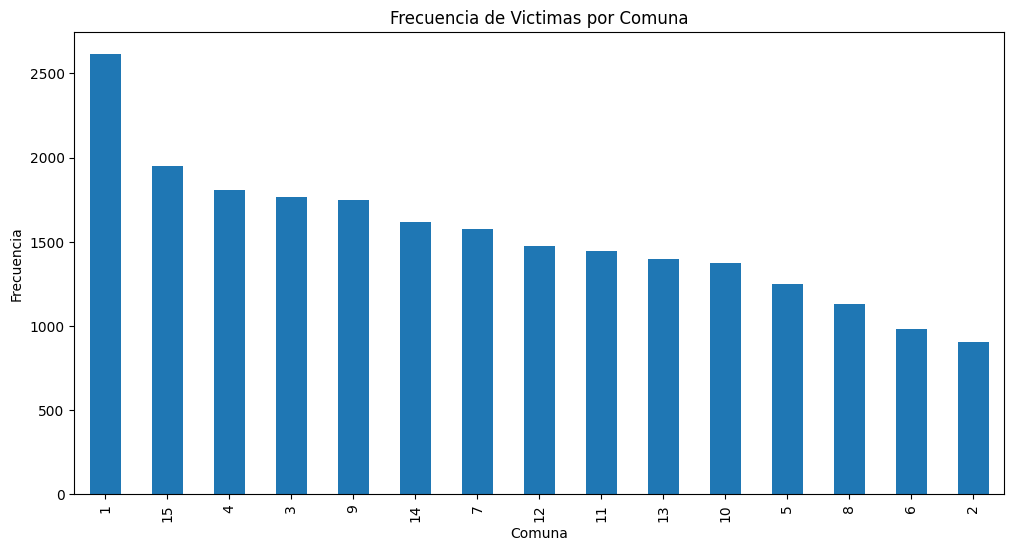

In [26]:
hechos_filtrados = hechos[~hechos['comuna'].isin(['SD', 'No Especificada', '0'])]

# Calcular la frecuencia de cada valor en 'comuna'
frecuencias = hechos_filtrados['comuna'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
frecuencias.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Victimas por Comuna')

# Mostrar el gráfico
plt.show()

##### Se observa la distribución que tiene la variable comuna con respecto a la cantidad de victimas involucradas en accidentes, allí es posible ver que encontramos un patrón lineal entre las comunas